Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [90]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('dataset.csv')

# Displaying the first few rows of the dataset to understand its structure
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [91]:
# Checking for missing values in the dataset
missing_data = df.isnull().sum()

# Displaying the missing values count in each column
print(missing_data)

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64


In [92]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

#Handling missing values in numerical columns by replacing them with the mean for each species
for col in numerical_columns:
    df.loc[df[col].isnull(), col] = df.groupby('species')[col].transform('mean')

#Handling missing values in the 'sex' column by replacing them with the mode of each species
df['sex'] = df.groupby('species')['sex'].transform(lambda x: x.fillna(x.mode()[0]))

In [93]:
print(df.isnull().sum())
print("\nMissing values after cleaning:")

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Missing values after cleaning:


Explanation:

I have checked for missing values in each column. ​

These are the number of missing values in the following columns:

bill_length_mm: 7 missing values,bill_depth_mm: 2 missing values,flipper_length_mm: 2 missing values,body_mass_g: 2 missing values,sex: 16 missing values

Preprocessing Steps:

For numerical columns (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g):
    I have filled missing values with the mean of the respective species, to preserve the species characteristics.

For categorical columns (sex):
    I have filled the rows with the most common value (mode) of that particular species.

In [94]:
#writing the preprocessed dataframe to a new csv file
df.head()
df.to_csv('output_file.csv', index=False)

In [95]:
df1=pd.read_csv('output_file.csv')
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,female
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3772.516556,female
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,female


Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [96]:
# Calculating the average body_mass_g for Gentoo penguins
gentoo_avg_body_mass = df1[df1['species'] == 'Gentoo']['body_mass_g'].mean()

print(gentoo_avg_body_mass)

5133.739837398374


Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

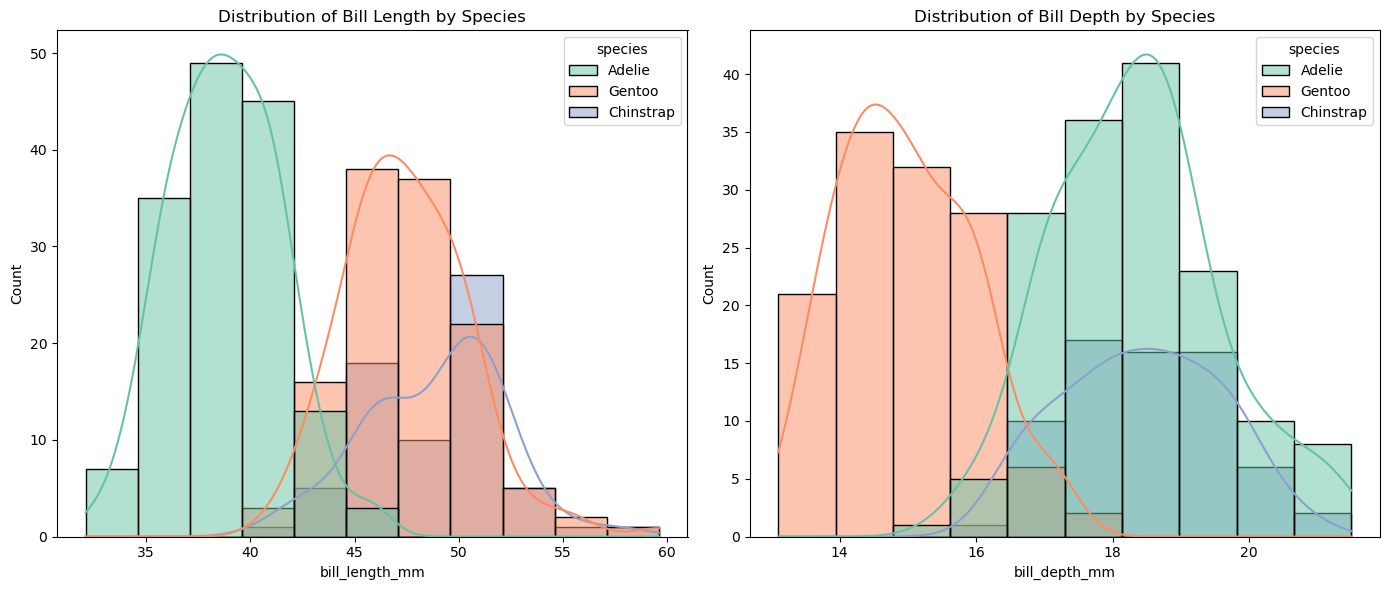


Adelie Penguins:
  Bill Length - Skewness: 0.16, Kurtosis: -0.17
  Bill Depth  - Skewness: 0.32, Kurtosis: -0.08

Gentoo Penguins:
  Bill Length - Skewness: 0.69, Kurtosis: 1.41
  Bill Depth  - Skewness: 0.32, Kurtosis: -0.59

Chinstrap Penguins:
  Bill Length - Skewness: -0.12, Kurtosis: 0.01
  Bill Depth  - Skewness: 0.01, Kurtosis: -0.90


In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Visualizing the distributions for bill_length_mm and bill_depth_mm
plt.figure(figsize=(14, 6))

# Plotting histograms with KDE for bill_length_mm
plt.subplot(1, 2, 1)
sns.histplot(data=df1, x='bill_length_mm', hue='species', kde=True, palette='Set2')
plt.title('Distribution of Bill Length by Species')

# Plotting histograms with KDE for bill_depth_mm
plt.subplot(1, 2, 2)
sns.histplot(data=df1, x='bill_depth_mm', hue='species', kde=True, palette='Set2')
plt.title('Distribution of Bill Depth by Species')

plt.tight_layout()
plt.show()

# Calculating skewness and kurtosis for each species
species_list = df1['species'].unique()
for species in species_list:
    species_data = df1[df1['species'] == species]
    bill_length_skew = skew(species_data['bill_length_mm'])
    bill_length_kurtosis = kurtosis(species_data['bill_length_mm'])
    bill_depth_skew = skew(species_data['bill_depth_mm'])
    bill_depth_kurtosis = kurtosis(species_data['bill_depth_mm'])
    
    print(f"\n{species} Penguins:")
    print(f"  Bill Length - Skewness: {bill_length_skew:.2f}, Kurtosis: {bill_length_kurtosis:.2f}")
    print(f"  Bill Depth  - Skewness: {bill_depth_skew:.2f}, Kurtosis: {bill_depth_kurtosis:.2f}")


Explanation:

Visualizations:
    I am plotting the Histograms with KDE (Kernel Density Estimate) overlays to view the distribution of bill_length_mm and bill_depth_mm across the different species to get a clear visual comparison.
    
Skewness and Kurtosis:
    Then i compute skewness and kurtosis for each species for both bill_length_mm and bill_depth_mm.Skewness tells us whether the distribution is symmetric or not, while kurtosis tells us if the distribution has light or heavy tails.

1. Adelie Penguins:

    Bill Length:
        Skewness: 0.16: This is a small positive skew, meaning the distribution of bill lengths for Adelie penguins is nearly symmetric but has a slight tail to the right (a few larger bill lengths than average).
        Kurtosis: -0.17: Slightly negative kurtosis indicates the distribution is close to normal but with somewhat lighter tails than a normal distribution, meaning fewer extreme values.

    Bill Depth:
        Skewness: 0.32: A small positive skew, indicating the distribution has a slight right tail, meaning there are some Adelie penguins with larger-than-average bill depths.
        Kurtosis: -0.08: Near zero kurtosis indicates a fairly normal distribution, with no significant outliers or extreme values in the bill depth measurements.

    Interpretation: The Adelie penguin bill length and depth distributions are both close to symmetrical and have fairly normal tails, with no major outliers. There is a slight tendency for longer bill lengths and deeper bill depths.

2. Gentoo Penguins:

    Bill Length:
        Skewness: 0.69: A moderate positive skew, suggesting that the distribution has a noticeable right tail, with some Gentoo penguins having significantly larger bill lengths compared to the rest.
        Kurtosis: 1.41: Positive kurtosis indicates a leptokurtic distribution, meaning the bill length distribution has heavier tails than a normal distribution, implying more outliers or extreme values (larger bills).

    Bill Depth:
        Skewness: 0.32: A small positive skew, meaning the distribution is slightly right-tailed, with some individuals having greater bill depths.
        Kurtosis: -0.59: Negative kurtosis indicates a platykurtic distribution, meaning the distribution has lighter tails than normal, with fewer outliers.

    Interpretation: For Gentoo penguins, bill lengths show a notable right skew with more extreme values (larger bills), while bill depths are fairly normal, with slightly lighter tails. There are more extreme bill length values compared to bill depth.

3. Chinstrap Penguins:

    Bill Length:
        Skewness: -0.12: A slight negative skew, meaning the distribution is almost symmetric but with a minor left tail, indicating a few shorter bill lengths.
        Kurtosis: 0.01: Near-zero kurtosis indicates a nearly normal distribution for bill lengths, with no significant presence of extreme values or outliers.
        
    Bill Depth:
        Skewness: 0.01: Essentially no skew, indicating a perfectly symmetric distribution of bill depths.
        Kurtosis: -0.90: Negative kurtosis suggests a platykurtic distribution with light tails, meaning very few extreme values for bill depth.

    Interpretation: The Chinstrap penguin has almost perfectly symmetrical distributions for both bill length and bill depth. The tails are light, indicating there are fewer outliers or extreme values in both measurements.

Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)


Outliers based on IQR method:
 bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          3
dtype: int64


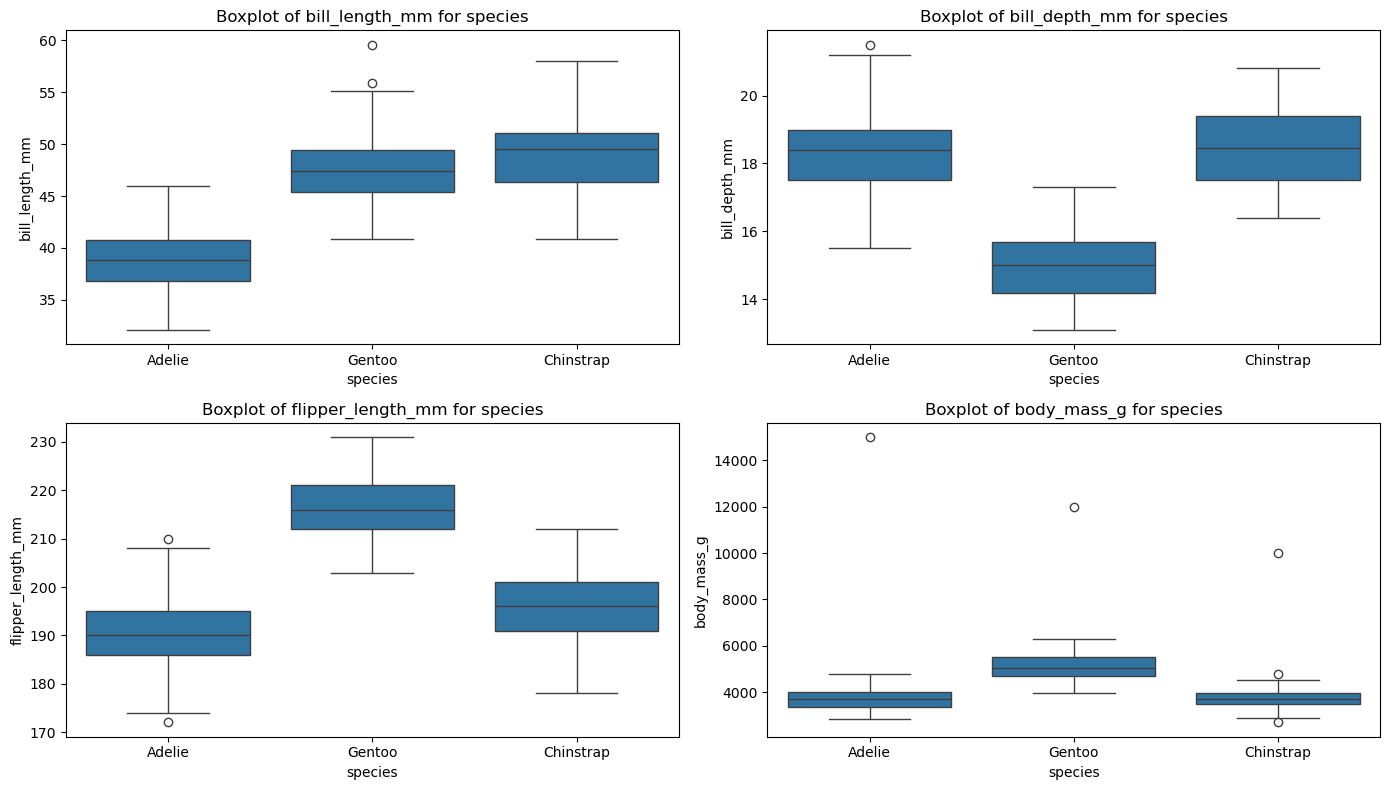

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Numerical columns to check for outliers
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Detecting outliers using IQR method
Q1 = df1[numerical_columns].quantile(0.25)
Q3 = df1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df1[numerical_columns] < (Q1 - 1.5 * IQR)) | (df1[numerical_columns] > (Q3 + 1.5 * IQR)))

# Summary of outliers detected
print("\nOutliers based on IQR method:\n", outliers_iqr.sum())

# Visualizing Outliers using Boxplots
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=column, data=df1)
    plt.title(f'Boxplot of {column} for species')
plt.tight_layout()
plt.show()

Explanation:

To identify the features with outliers in this dataset,i have used Interquartile Range (IQR) method.

IQR Method: The IQR is the range between the first quartile (Q1) and third quartile (Q3) of the data. Any data points outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.

Procedure:I have computed the first (Q1) and third (Q3) quartiles for each feature.The IQR is the range between Q1 and Q3.Any data points outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are considered outliers.

Visualization:
    Boxplots are generated for each feature to visually inspect the outliers. In a boxplot, outliers appear as individual points outside the whiskers.

So in this dataset only body_mass_g has outliers and other columns don't have outliers.

Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)

Number of components to retain for 72% variance: 2
Number of components to retain for 85% variance: 3
Number of components to retain for 95% variance: 4


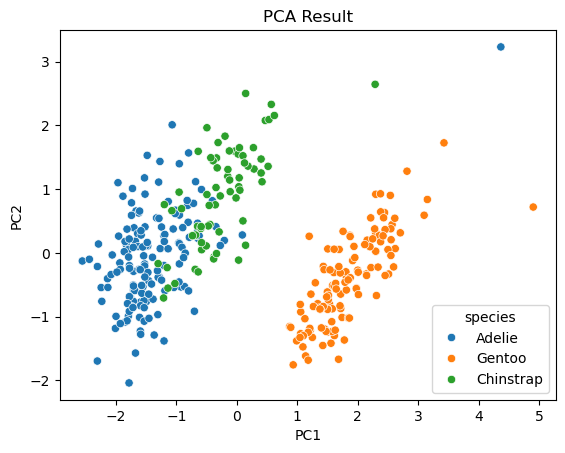

In [99]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical features
features = df1.select_dtypes(include=[float, int])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# # Fitting PCA on scaled data
pca = PCA()
pca.fit(scaled_data)

# # Explained variance and cumulative variance calculation
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Number of components for specific variances
n_components_72 = np.argmax(cumulative_variance >= 0.72) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to retain for 72% variance: {n_components_72}")
print(f"Number of components to retain for 85% variance: {n_components_85}")
print(f"Number of components to retain for 95% variance: {n_components_95}")

# # Performing PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
reduced_data = pca_2.fit_transform(scaled_data)

# # Creating a DataFrame with PCA results
pca_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
pca_df['species'] = df1['species'].values
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df)
plt.title('PCA Result')
plt.show()

Explanation:

Principal Component Analysis (PCA) is a technique that simplifies datasets by reducing their dimensionality while preserving as much variance as possible. The first principal component (pc1) accounts for the most significant portion of variance in the data, while the second principal component (pc2) captures the second-largest variance and so on.I have found number of components to retain for maintaining different levels of variances.

Number of components to retain for 72% variance is 2,number of components to retain for 85% variance is 3 and number of components to retain for 95% variance is 4.

I have also shown the visualization of the dataset by retaining only two principal components.

Depending on the type of analysis and the varaince we need from the dataset we can reduce the components.

Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

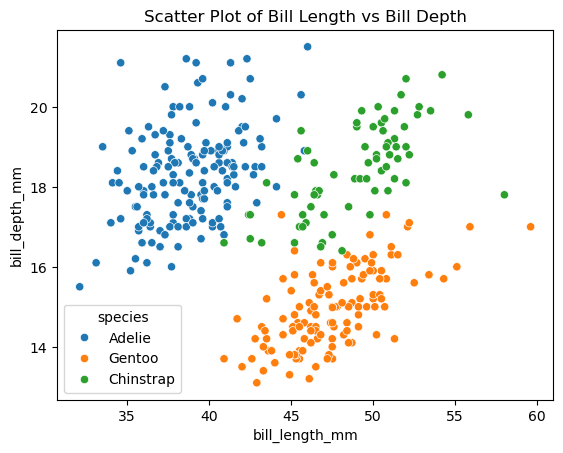

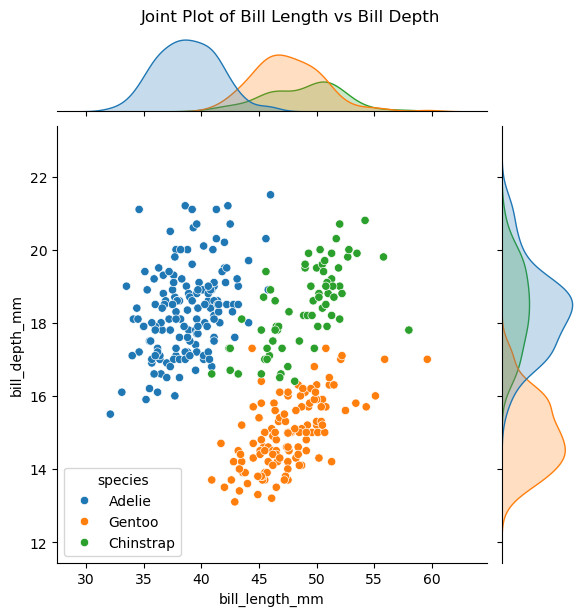

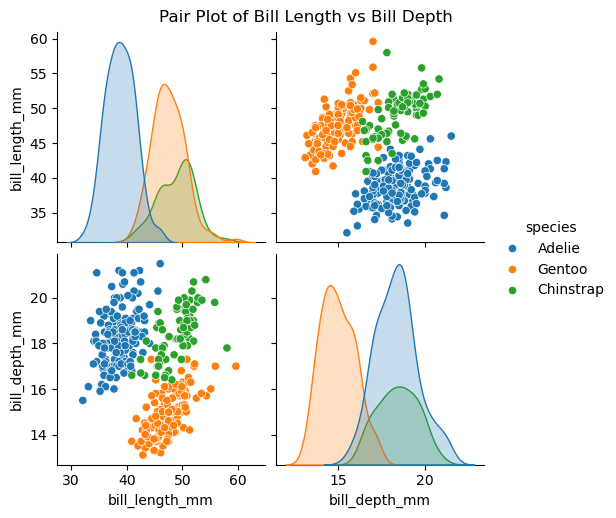

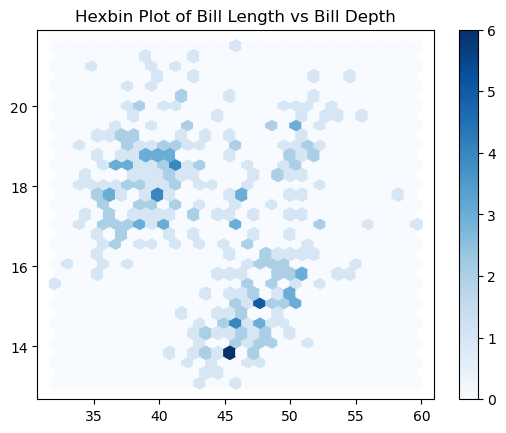

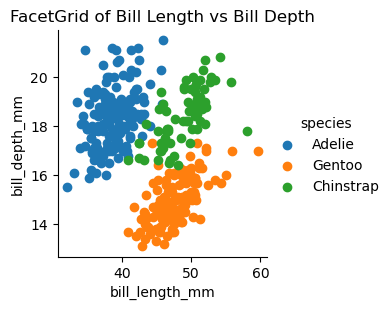

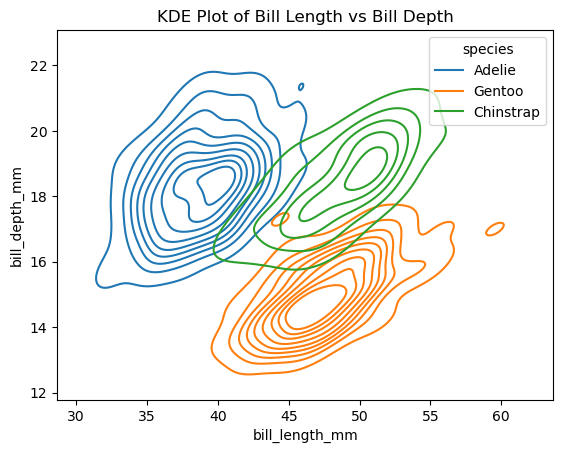

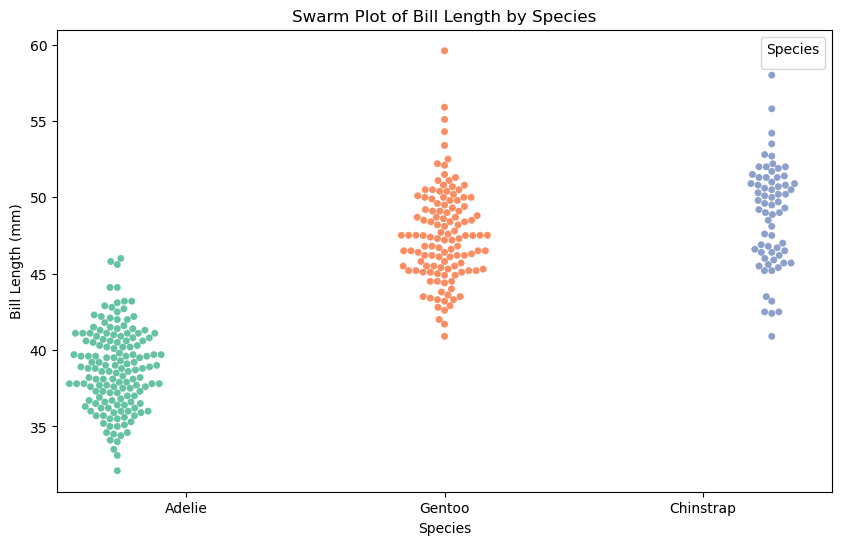

In [100]:
# Scatter plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df1)
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.show()

# Joint plot
g1 = sns.jointplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df1)
g1.figure.suptitle('Joint Plot of Bill Length vs Bill Depth', y=1.02)  # Adjust y for better placement
plt.show()

# Pair plot
g2 = sns.pairplot(df1, hue='species', vars=['bill_length_mm', 'bill_depth_mm'])
g2.figure.suptitle('Pair Plot of Bill Length vs Bill Depth', y=1.02)  # Adjust y for better placement
plt.show()

# Hexbin plot
plt.hexbin(df1['bill_length_mm'], df1['bill_depth_mm'], gridsize=30, cmap='Blues')
plt.colorbar()
plt.title('Hexbin Plot of Bill Length vs Bill Depth')
plt.show()

#FacetGrid
g = sns.FacetGrid(df1, hue='species')
g.map(plt.scatter, 'bill_length_mm', 'bill_depth_mm')
g.add_legend()
plt.title('FacetGrid of Bill Length vs Bill Depth')
plt.show()

# KDE plot
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df1)
plt.title('KDE Plot of Bill Length vs Bill Depth')
plt.show()

# Swarm Plot
plt.figure(figsize=(10, 6))
swarm = sns.swarmplot(x='species', y='bill_length_mm', hue='species', data=df1, dodge=True, palette='Set2', legend=False)
plt.title('Swarm Plot of Bill Length by Species')
plt.xlabel('Species')
plt.ylabel('Bill Length (mm)')
# Manually adding legend
handles, labels = swarm.get_legend_handles_labels()
plt.legend(handles, labels, title='Species', loc='upper right')
plt.show()

Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [105]:
# Grouping by species and island and then finding the maximum flipper_length_mm
max_flipper_length = df1.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

print(max_flipper_length,"\n")

print("species with longest flippers in Biscoe is Gentoo\nDream is Chinstrap\nTorgersen is Adelie")

     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0 

species with longest flippers in Biscoe is Gentoo
Dream is Chinstrap
Torgersen is Adelie


Q8: Perform z-score normalization on this dataset. (code)

In [102]:
from scipy.stats import zscore

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Applying z-score normalization to numerical columns
df_normalized = df1.copy()
df_normalized[numerical_columns] = df1[numerical_columns].apply(zscore)

print(df_normalized.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.886862       0.787370          -1.419545   
1  Adelie  Torgersen       -0.813408       0.127702          -1.063424   
2  Adelie  Torgersen       -0.666500       0.432164          -0.422406   
3  Adelie  Torgersen       -0.943533       0.607919          -0.781829   
4  Adelie  Torgersen       -1.327585       1.091831          -0.564854   

   body_mass_g     sex  
0    -0.470603    male  
1    -0.425785  female  
2    -0.918780  female  
3    -0.450420  female  
4    -0.739509  female  
